In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 4.8 MB/s 


https://pub.towardsai.net/explain-your-machine-learning-predictions-with-kernel-shap-kernel-explainer-fed56b9250b8

In [1]:
import sklearn
import pandas as pd
import numpy as np
import shap
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression

In [2]:
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(dataset_url, sep=';')

In [3]:
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
y = df['quality']
x = df.iloc[:,:-1]
print(x.shape, y.shape)
# Split the data into train and test data:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1599, 11) (1599,)
(1279, 11) (320, 11) (1279,) (320,)


In [23]:
# Build the model with the random forest regression algorithm:
lin_regr = LinearRegression()
lin_regr.fit(X_train.values, y_train.values)
y_pred = lin_regr.predict(X_test.values)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE: 0.6245199307980123


In [24]:

#In problems with large number of features we would want to pass only the median of the training dataset, or weighted k-median
X_train_summary = shap.kmeans(X_train, 10)
X_train_summary.data.shape

(10, 11)

[Kernel Explainer](https://https://shap-lrjball.readthedocs.io/en/latest/generated/shap.KernelExplainer.html)

In [25]:
# shap.initjs()
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:].values)
shap_values

array([-0.01460206, -0.02733037,  0.02703244, -0.00032693, -0.04570495,
       -0.0105353 ,  0.00341649, -0.00340267,  0.02924186, -0.00050641,
       -0.22496066])

In [26]:
X_test.iloc[0,:]

fixed acidity            7.7000
volatile acidity         0.5600
citric acid              0.0800
residual sugar           2.5000
chlorides                0.1140
free sulfur dioxide     14.0000
total sulfur dioxide    46.0000
density                  0.9971
pH                       3.2400
sulphates                0.6600
alcohol                  9.6000
Name: 803, dtype: float64

In [27]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

In [31]:
shap.initjs()
shap.force_plot(ex.expected_value, shap_values, X_test)

  0%|          | 0/320 [00:00<?, ?it/s]

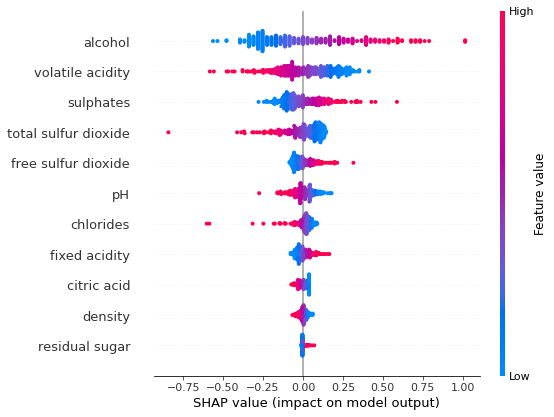

In [33]:
shap.initjs()
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

  0%|          | 0/320 [00:00<?, ?it/s]

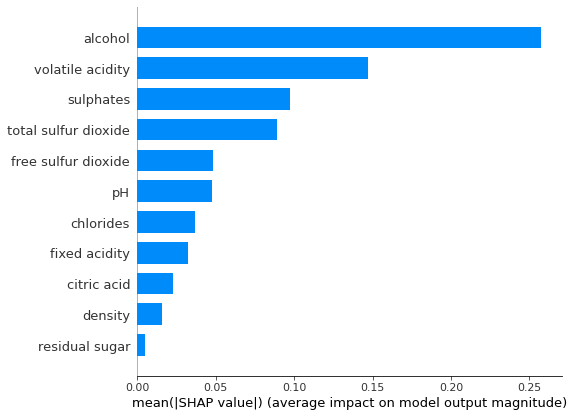

In [34]:
shap.initjs()
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_type='bar')

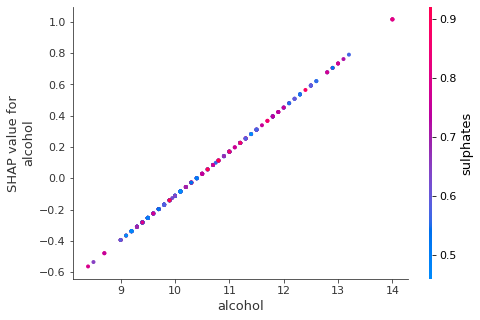

In [32]:
shap.dependence_plot('alcohol', shap_values, X_test)
